<a href="https://colab.research.google.com/github/hypnoticmeraj/EDA-Project--Hote-booking-analysis-/blob/main/EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

### Dataset Loading

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
file_path="/content/drive/MyDrive/Colab Notebooks/Dataset/Hotel Bookings.csv"
hba_data=pd.read_csv(file_path)

In [4]:
# Let's create a copy of our dataset so that the original dataset does not get affected
df=hba_data.copy()

### Dataset First View

In [5]:
# Let's get first five rows of our dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Let's get last five rows of our dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
# Let's merge first and last seven rows of our dataframe
merged_df=pd.concat([df.head(7),df.tail(7)])
merged_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
# Let's get the shape of our dataset
df.shape

(119390, 32)

In [9]:
# Let's print the number of rows and number of columns oof our dataset
print(f' The number of rows in our dataset is {df.shape[0]}')
print(f' The number of columns in our dataset is {df.shape[1]}')

 The number of rows in our dataset is 119390
 The number of columns in our dataset is 32


### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
# Let's summarize our data in a descriptive format
df.describe().T    # Viewing in a transpose format to understand easily 

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [12]:
# Let's get the datatype ofeach pf the columns
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [13]:
# Let's get a quick look of our data that how many null values are present in each column of our dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Important points to be noted here:-
#### 1:- We see that columns like children,country,agent and commpany contains null values of total 4,488, 16340 and 112593 respectively.
#### 2:- Agent, company contains many high null values which might affect our data exploration and might affect the actual result. So we may drop these columns or can fill these null values with '0'.
#### 3:- Columns like children and company also contains full null values so we fill them with their avergae values so that it does not affect our outcome.

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

In [15]:
# getting shape of duplicate values
df[df.duplicated()].shape

(31994, 32)

##### We have in total 31994 duplicate values and we will drop these duplicate values.

In [16]:
# droping the duplicated values
df.drop_duplicates(inplace =True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

##### After dropping the duplicated values, we have in total 87396 rows and 32 columns.

#### **Missing Values/Null Values**

In [18]:
# Missing Values/Null Values Count 
sum_null_values=df.isnull().sum().sort_values(ascending=False)
sum_null_values[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

##### We see that after removing the duplicated values, we have 82137 null values in company column, 12193 null values in agent column,  452 null values in country column and 4 null values in children column.


In [19]:
# Missing values percent
percent_null_values= df.isnull().mean()*100
percent_null_values.sort_values(ascending=False).round(3)[:5]

company               93.983
agent                 13.951
country                0.517
children               0.005
reserved_room_type     0.000
dtype: float64

##### We see that the company column contain almost 94% of null values. So, it is better to drop country column.
Now before droping and filling all the null values, let's get a visualization of null values and see what it tell us. 

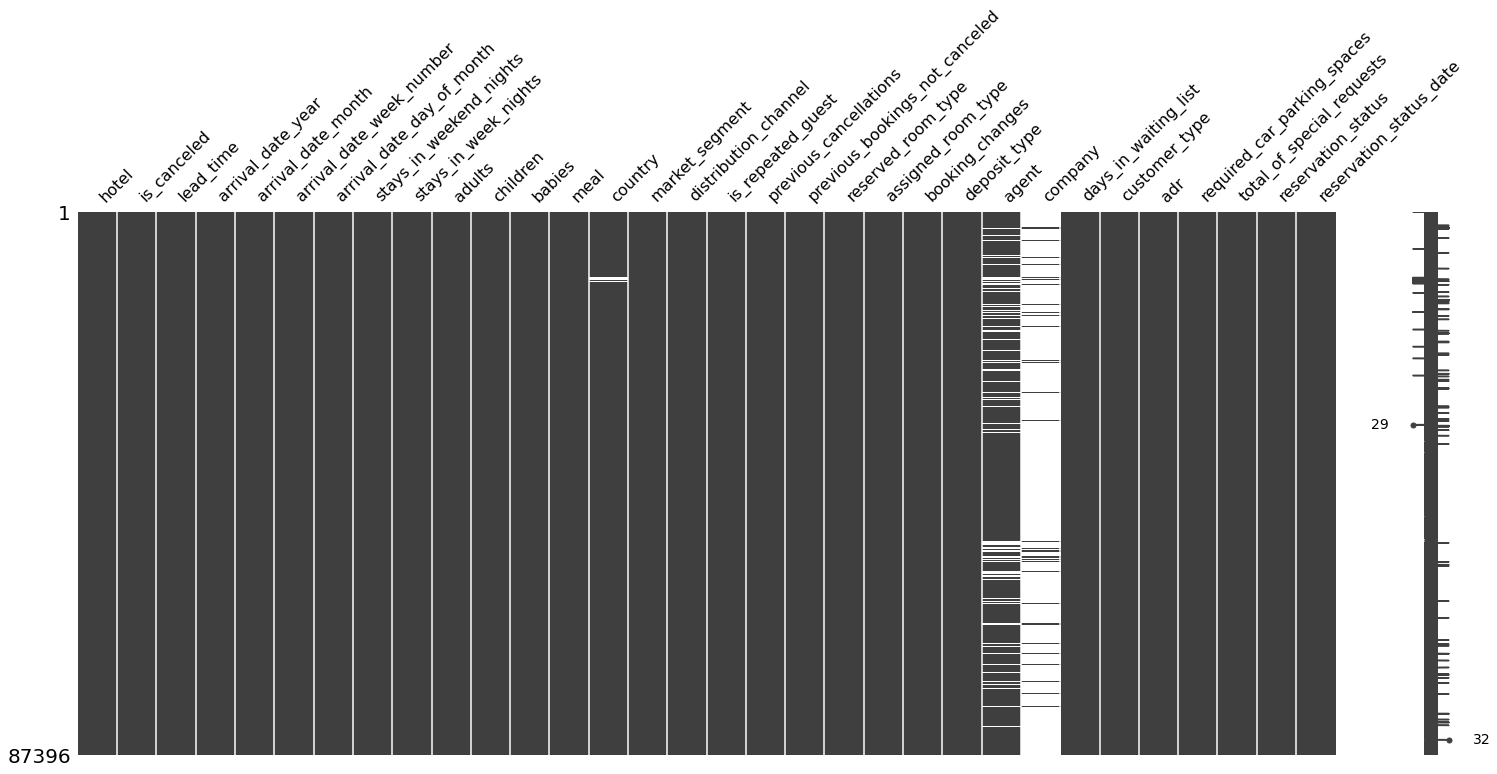

In [20]:
# Let's visualize the null values using matrix 
msno.matrix(df)

##### The matrix above show the null value in each of the row of our dataframe.
The white horizontal line show the null values of each column of particular rows.
We see that the column company contains the maximum null values followed by the column agent, which matches our data also. 

#### Now let's fill all the null values.

In [21]:
# Filling/replacing all the null values of the column 'agent' with the value 0.0
df['agent'].fillna(0.0, inplace = True) 

In [22]:
# Filling/replacing all the null values of the column 'company' with the value 0.0
df['company'].fillna(0.0, inplace= True)

In [23]:
# Filling/replacing all the null values of the column 'children' with most occured number
df['children'].fillna(df['children'].mean(), inplace = True) 

In [24]:
# Filling/replacing all the null values of the column 'country'
# In place of null values we will put 'Others' as there might be some customer from the country whose name is not present in the given country list during time of booking.
df['country'].fillna('Others', inplace=True)

In [25]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#####  From the above output we can infer that we have filled all the null values from our data frame.

### **Changing datatypes of some of our columns**

In [26]:
# let's re-check columns datatype
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

##### We see that the columns children,company, agents are float data types which does not make any sense so will convert their datatypes to int.
Moreover, reservation_status_date is object datatype so we will convert it into datetime.

In [27]:
# changing datatype of children,company,agent to int
df[['children','company','agent']]=df[['children','company','agent']].astype(int)
# changing datatype of 'reservation_status_date' to datetime
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

In [28]:
# Let's convert datatype to str
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

#### There are many rows that contains 0 adults that does not makenany sensse. So we will remove those rows.

In [29]:
# Let's drop the rows which contain 0 values in adults,babies,children
df = df.drop(df[(df.adults+df.babies+df.children)==0].index) 

### **Adding/Merging columns**

In [30]:
# Let's add a new column 
df['arrival_date']=df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']+ '-'+ df['arrival_date_day_of_month'].astype(str)
df['arrival_date']=df['arrival_date'].apply(pd.to_datetime)

In [31]:
# Let's add few more columns in our dataset
df['kids']=df['babies'] + df['children']          # adding a "kids" column based on summation of no. of babies and no. of children
df['total_night_stays']=df['stays_in_weekend_nights'] + df['stays_in_week_nights']      # adding a "total_night_stays" based on "stays_in_weekend_nights" and in "stays_in_week_nights"

# Adding one more column of total_members
df['total_members']= df['adults'] + df['kids']      # adding "total_members" by taking summation of adults and kids

In [32]:
# Adding a revenue column calculated as "adr" * "total_night_stays"
df['revenue']=df['adr']* df['total_night_stays']
df['revenue']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: revenue, Length: 87230, dtype: float64

In [33]:
# Let's drop total_night_stays=0
df=df.drop(df[df['total_night_stays']==0].index)

In [34]:
# Now let's see our dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,kids,total_night_stays,total_members,revenue
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0,1,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0,1,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2015-07-01,0,2,2,196.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,107.0,0,0,Check-Out,2015-07-03,2015-07-01,0,2,2,214.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,103.0,0,1,Check-Out,2015-07-03,2015-07-01,0,2,2,206.0


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [35]:
# Dataset Columns
df.columns   

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date', 'kids',
       'total_night_stays', 'total_members', 'revenue'],
      dtype='object')

In [36]:
# Dataset Describe
cols_want=['total_members','adults','kids','adr','agent','lead_time','booking_changes','total_night_stays']
df[cols_want].describe().T   # Getting the transpose view to understand easily 

,count,mean,std,min,25%,50%,75%,max
total_members,86639.0,2.030667,0.790706,1.00,2.0,2.0,2.000,55.0
adults,86639.0,1.880504,0.622269,0.00,2.0,2.0,2.000,55.0
kids,86639.0,0.150163,0.472792,0.00,0.0,0.0,0.000,10.0
adr,86639.0,107.244634,54.366121,-6.38,72.9,99.0,134.435,5400.0
agent,86639.0,80.963758,109.918699,0.00,9.0,9.0,234.000,535.0
lead_time,86639.0,80.293090,86.073687,0.00,12.0,50.0,126.000,709.0
booking_changes,86639.0,0.268170,0.709928,0.00,0.0,0.0,0.000,18.0
total_night_stays,86639.0,3.653285,2.735811,1.00,2.0,3.0,5.000,69.0


#### **Quick observation**

1.   The average total night stays is 3.62
2.   Highest total nights stay is 69
3.   On an average 81 guests book their hotels through agent
4.   Average lead time is 80 days
5.   On an average there is very low guests who have cancelled their bookings
6.   In each bookings on an average there are 1.8 adults and 0.15 kids



### Variables Description 

**hotel** : Hotel(Resort Hotel or City Hotel)

**is_canceled** : Value indicating if the booking was canceled (1) or not (0)

**lead_time** : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**arrival_date_year** : Year of arrival date

**arrival_date_month** : Month of arrival date

**arrival_date_week_number** : Week number of year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults** : Number of adults

**children** : Number of children

**babies** : Number of babies

**meal** : Type of meal booked. Categories are presented in standard **hospitality** meal packages:

**country** : Country of origin.

**market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type** : Code for the type of room assigned to the booking.

**booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type** : Indication on if the customer made a deposit to guarantee the booking.

**agent** : ID of the travel agency that made the booking

**company** : ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type** : Type of booking, assuming one of four categories

**adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**: Reservation last status, assuming one of three categories

**Canceled** – booking was canceled by the customer Check-Out – customer has checked in but already departed No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel








### Check Unique Values for each variable.

In [37]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("The unique values in",i, "is",df[i].nunique(),".") 

The unique values in hotel is 2 .
The unique values in is_canceled is 2 .
The unique values in lead_time is 478 .
The unique values in arrival_date_year is 3 .
The unique values in arrival_date_month is 12 .
The unique values in arrival_date_week_number is 53 .
The unique values in arrival_date_day_of_month is 31 .
The unique values in stays_in_weekend_nights is 17 .
The unique values in stays_in_week_nights is 33 .
The unique values in adults is 14 .
The unique values in children is 5 .
The unique values in babies is 5 .
The unique values in meal is 5 .
The unique values in country is 178 .
The unique values in market_segment is 8 .
The unique values in distribution_channel is 5 .
The unique values in is_repeated_guest is 2 .
The unique values in previous_cancellations is 15 .
The unique values in previous_bookings_not_canceled is 73 .
The unique values in reserved_room_type is 9 .
The unique values in assigned_room_type is 11 .
The unique values in booking_changes is 19 .
The unique 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Variable**

**1 :-**  **Total bookings in both type of Hotels**

In [38]:
# Let's see the no. of bookings in each type of hotel
hotel_wise_bookings=df['hotel'].value_counts()
hotel_wise_bookings

City Hotel      53043
Resort Hotel    33596
Name: hotel, dtype: int64

##### From the above data, it is clearly seen that City Hotel has most highest number of bookings of total 53274 and Resort Hotel has total bookings of 33956.
Let's now visualize it by bar chart and pie chart.

#### Chart - 1

<Figure size 1080x576 with 0 Axes>

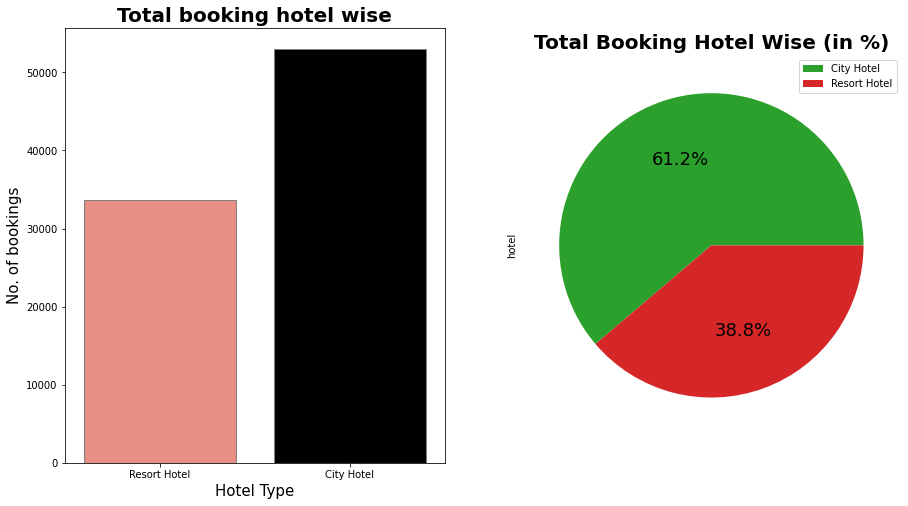

In [39]:
# Chart - 1 visualization code
plt.figure(figsize=(15,8))
fig, axes = plt.subplots(1,2, figsize=(36, 8))
ax=sns.countplot(ax=axes[0],data=df,x='hotel',palette=['salmon', 'black'],edgecolor='grey')           # setting color to salmon and black, setting edge color to black
ax.set_title('Total booking hotel wise',fontsize = 20, fontweight='bold')         # setting title - fontsize to 20 and in bold
ax.set_ylabel('No. of bookings', fontsize=15)               # setting y_label
ax.set_xlabel('Hotel Type', fontsize = 15)                  # setting x_label 

# getting the same in percentage terms by using pie chart
hotel_wise_bookings.plot(kind='pie',ax=axes[1],autopct='%1.1f%%',labels=None,figsize=(15,8),fontsize=18,colors=['tab:green','tab:red'])
plt.title('Total Booking Hotel Wise (in %)',fontsize = 20, fontweight='bold')          # setting title
plt.legend(loc='upper right',labels=df['hotel'].value_counts().index.tolist())        # setting legend

##### 1. Why did you pick the specific chart?

Here we chose bar graph and pie chart to show the total number of bookings for each hotel types.Pie Chart is useful in comparing two numerical values in a percentage form and Bar Chart is useful as it shows the value of of different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above bar chart it is clear that City Hotel has most number of bookings of 53274 and Resort Hotel has total bookings of 33956.
 We see that City Hotel has highest number of bookings of 61.2% and Resort Hotel acquire 38.8% of total bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

City Hotel acquired highest number of bookings as it might be in a City and Resort Hotel have less number of bookinngs as it is mosstly outside of city and people mostly choose Resort Hotel for vaccation.

####2: **How many hotels booking are done through agent?** 

In [40]:
highest_bookings_by_agent=df.groupby('agent')['agent'].agg({'count'}).reset_index().rename(columns={'count':'most_booking'}).sort_values(by='most_booking',ascending=False)
highest_bookings_by_agent

,agent,most_booking
9,9,28654
174,240,12907
0,0,11958
14,14,3329
7,7,3282
...,...,...
194,267,1
65,73,1
251,352,1
193,265,1


In [41]:
# We have seen earlier that agent 0 contains null values which we filled by 0 so it's better to just drop agent 0
highest_bookings_by_agent.drop(highest_bookings_by_agent[highest_bookings_by_agent['agent']==0].index,inplace=True)
# Let's get the graph for top 5 agents
top_five=highest_bookings_by_agent[:5]

#### Chart - 2

Text(0, 0.5, 'No. of bookings')

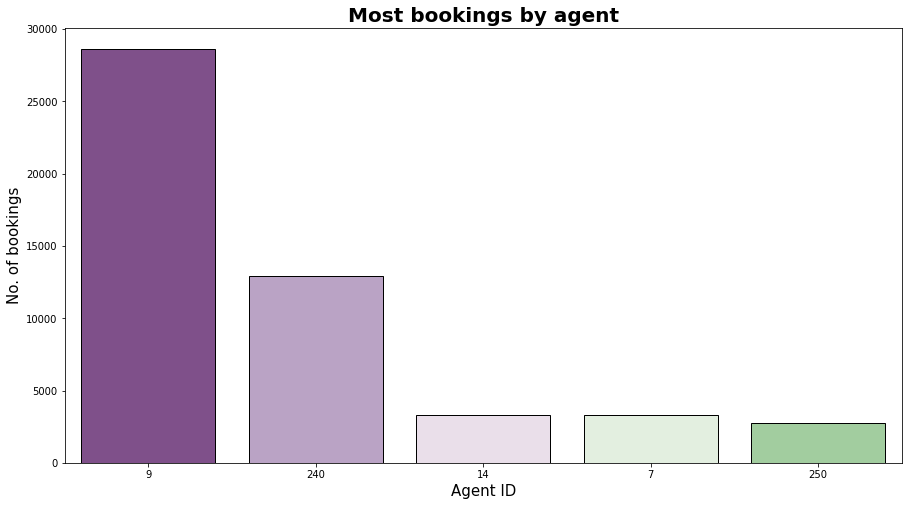

In [42]:
# Chart -2 visualization code 
plt.figure(figsize=(15,8))                  # setting figure size
sns.set_palette('PRGn')                     # setting figure color
sns.barplot(x=top_five['agent'],y=top_five['most_booking'],order=top_five['agent'],edgecolor='black')
plt.title('Most bookings by agent',fontsize=20,fontweight='bold')                # setting title
plt.xlabel('Agent ID',fontsize=15)                                               # setting x-label
plt.ylabel('No. of bookings',fontsize=15)                                        # setting y-label

##### 1. Why did you pick the specific chart?

Here we chose bar graph has it shows the different categories values in more meaningful sense.


##### 2. What is/are the insight(s) found from the chart?

The above graph shows top 5 Agent with highest number of bookings. The top five Agents are  Agent 9, Agent 240, Agent 14, Agent 7, Agent 250.Agent 9 has done the highest booking of 28654.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gain insights will help creating a positive business impact as now the Agent which has done low amount of bookings should be given more training off how to approach and convience the customers to book their Hotel rooms thorugh agents.

**3:- How many bookings made in each year for each Hotel type?**


In [43]:
df[['hotel','arrival_date_year']].value_counts().reset_index().rename(columns={'arrival_date_year':'year',0:'Count of bookings'})

,hotel,year,Count of bookings
0,City Hotel,2016,26549
1,City Hotel,2017,20014
2,Resort Hotel,2016,15418
3,Resort Hotel,2017,11516
4,Resort Hotel,2015,6662
5,City Hotel,2015,6480


#### Chart - 3

Text(0, 0.5, 'Reservation Count')

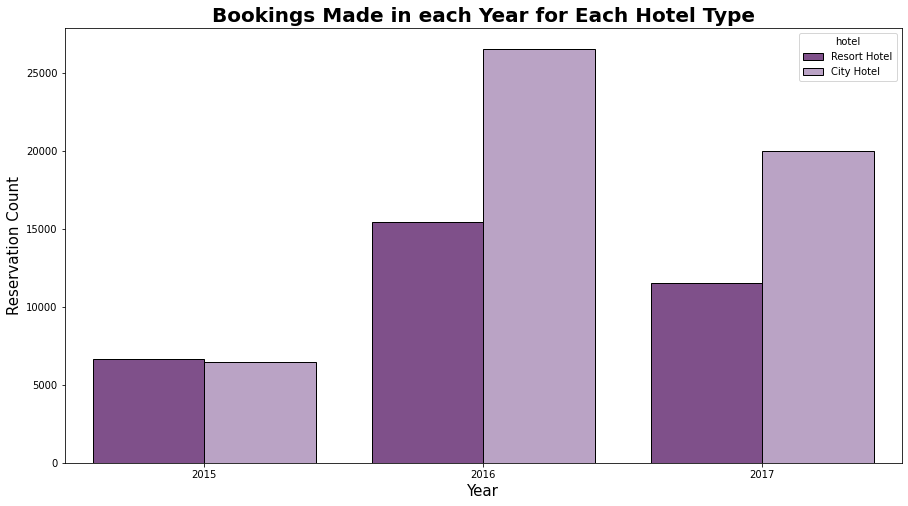

In [44]:
# Chart - 3 visualization code 
# This graph shows the booking made in each month for different hotel types
plt.figure(figsize=(15,8))     # setting figure size
sns.set_palette('PRGn')                     # setting color
hotel_booking_each_year=sns.countplot(x='arrival_date_year',hue='hotel',data=df,edgecolor='black')   
plt.title('Bookings Made in each Year for Each Hotel Type',fontsize = 20, fontweight='bold')         # setting title
plt.xlabel('Year',fontsize = 15)                  # setting x-label
plt.ylabel('Reservation Count',fontsize = 15)     # setting y-label 

##### 1. Why did you pick the specific chart?

Here we chose countplot to show the total bookings in particular year for each hotel types. 

##### 2. What is/are the insight(s) found from the chart?

We see that the year 2016 has highest number of bookings, followed by 2017 and then 2015.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**4:- Reservation bookings based on lead time**

In [45]:
lead_time=df.groupby(['arrival_date_month','hotel'])['lead_time'].mean()
lead_time=lead_time.astype(int).reset_index() 

In [46]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
lead_time['arrival_date_month']=pd.Categorical(lead_time['arrival_date_month'],categories=months,ordered=True)

#### Chart - 4

Text(0, 0.5, 'Average Lead Time')

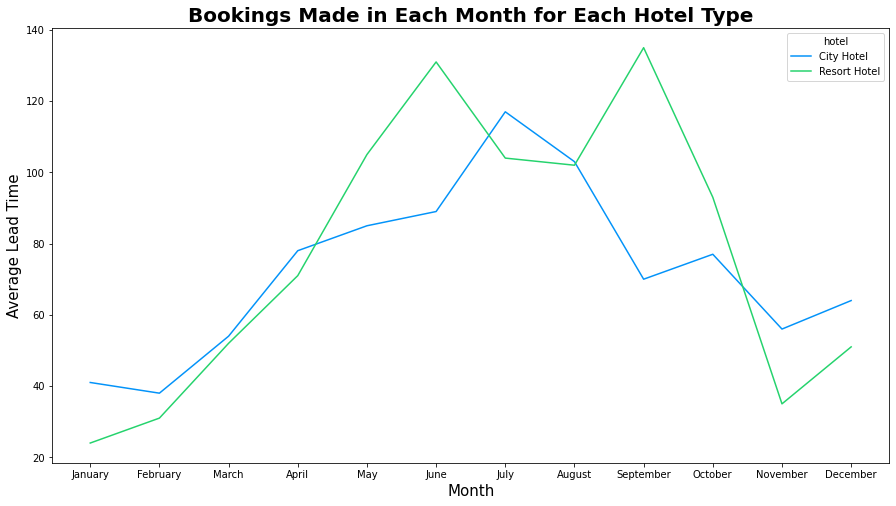

In [47]:
# Chart - 4 visualization code
plt.figure(figsize=(15,8))     # setting figure size
sns.set_palette('terrain')      # setting color
sns.lineplot(x=lead_time['arrival_date_month'],y=lead_time['lead_time'],hue=lead_time['hotel'],data=df)   
plt.title('Bookings Made in Each Month for Each Hotel Type',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize = 15)                 # setting x-label
plt.ylabel('Average Lead Time',fontsize = 15)     # setting y-label 

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see in city hotels there is a peak in lead time from April to July. And in resort hotels we can see two peaks in lead time, first in June and second in September

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**5:- How many bookings are there in each month and for each Hotel type?**

In [48]:
df[['hotel','arrival_date_month']].value_counts().reset_index().rename(columns={'arrival_date_month':'month',0:'Count of bookings'})

,hotel,month,Count of bookings
0,City Hotel,August,6561
1,City Hotel,July,5714
2,City Hotel,May,5389
3,City Hotel,April,5062
4,City Hotel,June,4986
5,City Hotel,March,4812
6,Resort Hotel,August,4633
7,Resort Hotel,July,4274
8,City Hotel,September,4217
9,City Hotel,October,4158


In [49]:
# Let's arrange the months in month order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month']=pd.Categorical(df['arrival_date_month'],categories=months,ordered=True)

#### Chart - 5

Text(0, 0.5, 'Reservation Count')

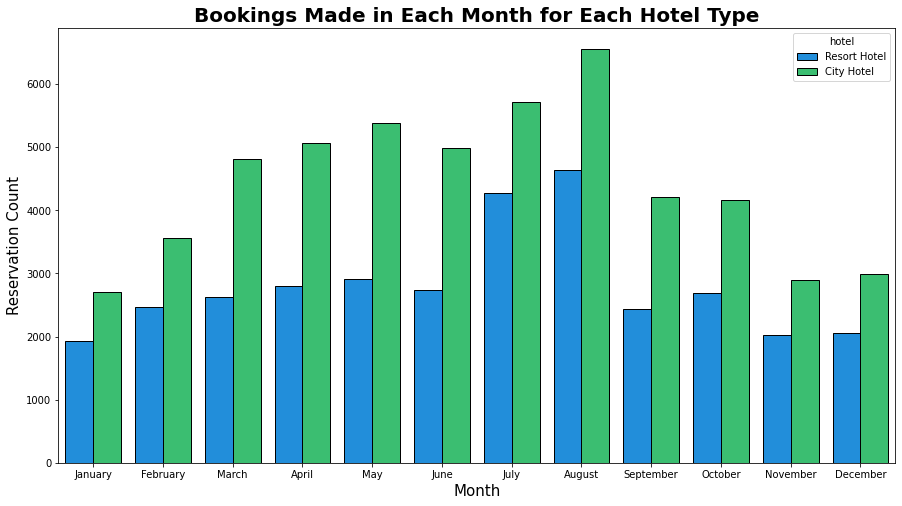

In [50]:
# Chart - 5 visualization code
plt.figure(figsize=(15,8))     # setting figure size
sns.set_palette('terrain')      # setting color
sns.countplot(x='arrival_date_month',hue='hotel',data=df,edgecolor='black')   
plt.title('Bookings Made in Each Month for Each Hotel Type',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize = 15)                 # setting x-label
plt.ylabel('Reservation Count',fontsize = 15)     # setting y-label 

##### 1. Why did you pick the specific chart?

Here we choose bar graph to depict the bookings of hotel in each month as it is more convient to understand different categories of values in a  bar graph.

##### 2. What is/are the insight(s) found from the chart?

We see that month of Auguest has highest number of bookings for both City Hotel and Resort Hotel, followed by the month of July. December and Janauray have lowest recorded lowest amount of bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

December and January have lowest amount of bookings. It might be due to at this time Hotel keeps their prices very high. 

### **6:-** **Top five countries with maximum number of visitors**

In [51]:
count_country=df['country'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'country','country':'count of travelers'})
count_country_top_five=count_country[:5]
count_country_top_five

,country,count of travelers
0,PRT,26864
1,GBR,10401
2,FRA,8813
3,ESP,7228
4,DEU,5385


##### From the above table it can be seen that the top most traveler are from PRT (Portugal), followed by GBR.
##### Let's now show the same using bar chart

#### Chart - 6

Text(0, 0.5, 'No. of  bookings')

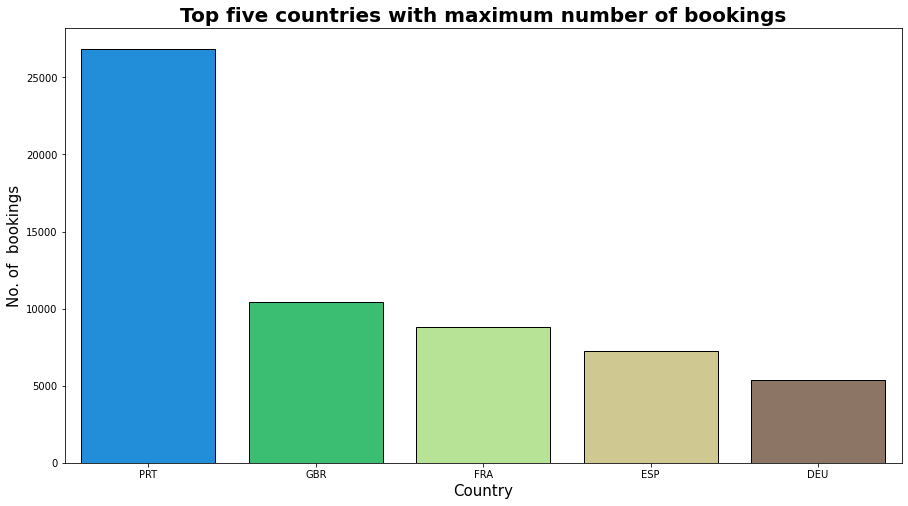

In [52]:
# Chart - 6 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x=count_country_top_five['country'],y=count_country_top_five['count of travelers'],order=count_country_top_five['country'],edgecolor='black')
plt.title('Top five countries with maximum number of bookings', fontsize=20,fontweight='bold')
plt.xlabel('Country', fontsize=15)
plt.ylabel('No. of  bookings', fontsize=15)

##### 1. Why did you pick the specific chart?

Here we chose bar graph to show different categories of values.

##### 2. What is/are the insight(s) found from the chart?

The top five countries are PRT(Portugal), GBR(United Kingdom), FRA(France), ESP(Spain) and DEU(Germany). Highest number of visitors are coming from Portugal followed by United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This bar is really helpful in showing the top five countries with maximum visitors. Through this chart it can be say that most of the visitors is from European countries and the Hotels needs to work more towards attracting the Non-European counntries visitors.

###7:- **Cancelation Status by Hotel Type**

In [53]:
cancelation_status=df[['is_canceled','hotel']].value_counts()
cancelation_status

is_canceled  hotel       
0            City Hotel      37021
             Resort Hotel    25632
1            City Hotel      16022
             Resort Hotel     7964
dtype: int64

#### Chart - 7

Text(0, 0.5, 'Count')

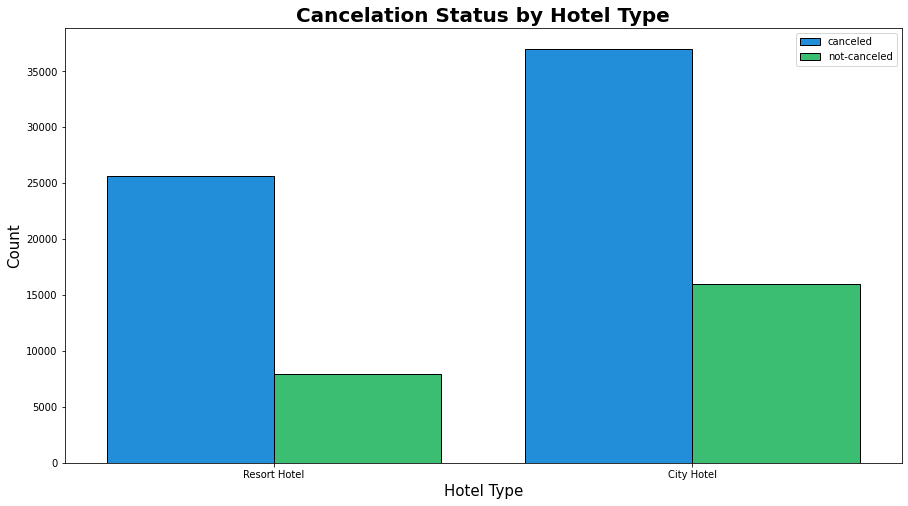

In [54]:
# Chart - 7 visualization code
plt.figure(figsize=(15,8))     # setting figure size
sns.set_palette('terrain')      # setting color
hotel_booking_each_year=sns.countplot(x='hotel',hue='is_canceled', data=df, edgecolor='black')   
plt.title('Cancelation Status by Hotel Type',fontsize = 20, fontweight='bold')    # setting title
plt.legend(loc='upper right',labels=['canceled','not-canceled'])         # setting legend
plt.xlabel('Hotel Type',fontsize = 15)        # setting x-label
plt.ylabel('Count',fontsize = 15)             # setting x-label


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

 In both the hotel type, the proportion of cancellation is more than the confirmed status.Moreover, cancelation is less in Resort Hotel compared to City Hotel.This may be due to City hotel's higher number of bookings compared to Resort Hotel.This may be due to City hotel's higher number of bookings compared to Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies.

#### Chart - 8

Text(0, 0.5, 'ADR')

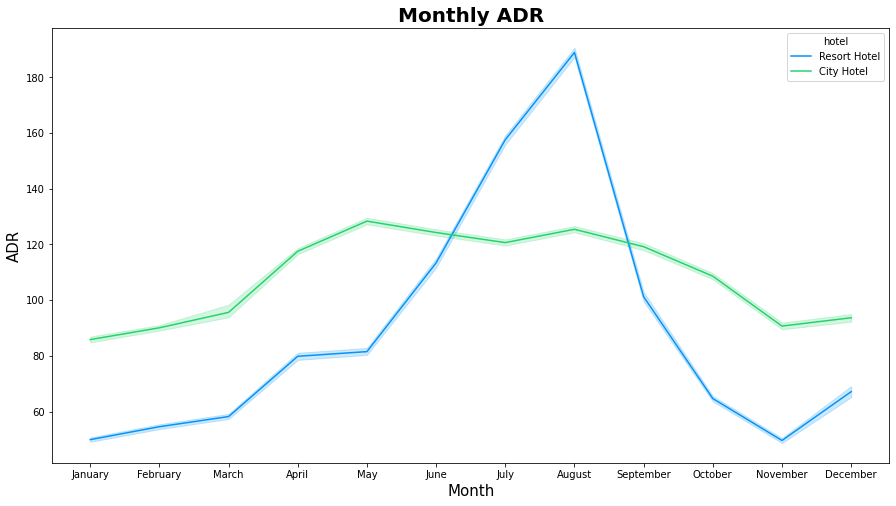

In [55]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))     # setting figure size
sns.lineplot(x=df['arrival_date_month'],y=df['adr'],hue=df['hotel']) 
plt.title('Monthly ADR',fontsize=20,fontweight='bold')      # setting title
plt.xlabel('Month',fontsize = 15)        # setting x-label
plt.ylabel('ADR',fontsize = 15)          # setting x-label

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

For Resort hotel, ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.
The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 9:- **Which channel is mostly used for early booking of hotels?**

In [56]:
segments=df['market_segment'].value_counts()
segments

Online TA        51285
Offline TA/TO    13749
Direct           11652
Groups            4892
Corporate         4155
Complementary      682
Aviation           222
Undefined            2
Name: market_segment, dtype: int64

#### Chart - 9

Text(0, 0.5, 'Count')

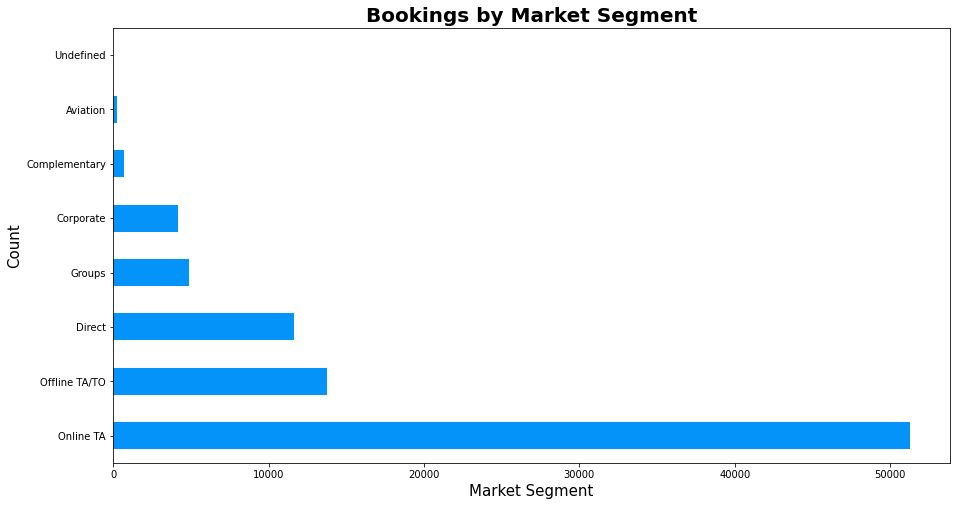

In [57]:
# Chart - 9 visualization code
segments.plot(kind='barh',figsize=(15,8))
plt.title('Bookings by Market Segment',fontsize=20,fontweight='bold')      # setting title
plt.xlabel('Market Segment',fontsize = 15)        # setting x-label
plt.ylabel('Count',fontsize = 15)          # setting x-label 

Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

##### 1. Why did you pick the specific chart?

Here we used horizontal bar graph to show different ctegories values.

##### 2. What is/are the insight(s) found from the chart?

Around  51285 of bookings are made via Online Travel Agents, almost 13749 of bookings are made via Offline Travel Agents and the rest are Direct bookings without any other agents.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the bookings are through online agent mode as it might be easier to done booking via online by agent than to directly book thorugh Hotel official website.

**10:- Market share of different customers**

In [58]:
customer_market_share=df['customer_type'].value_counts()
customer_market_share

Transient          71366
Transient-Party    11618
Contract            3119
Group                536
Name: customer_type, dtype: int64

#### Chart - 10

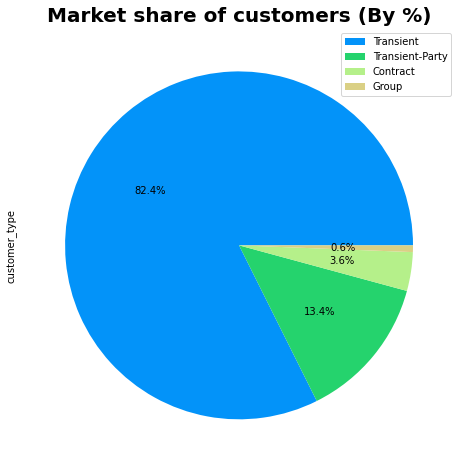

In [59]:
# Chart - 10 visualization code
customer_market_share.plot(kind='pie',figsize=(15,8),autopct='%1.1f%%',labels=None)
plt.title('Market share of customers (By %)', fontsize=20, fontweight='bold')
plt.legend(loc='upper right',labels=df['customer_type'].value_counts().index.tolist())

##### 1. Why did you pick the specific chart?

Here we used pie chart as it shows percentage share of each customers.

##### 2. What is/are the insight(s) found from the chart?

Transient Customer type captured highest bookings share of around 82% and then followed by Transient-Party . Group type has captured only negligible amount of 0.6%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**11:- Bookings based on deposit type**

In [60]:
df[['deposit_type','hotel']].value_counts()

deposit_type  hotel       
No Deposit    City Hotel      52183
              Resort Hotel    33311
Non Refund    City Hotel        845
              Resort Hotel      193
Refundable    Resort Hotel       92
              City Hotel         15
dtype: int64

#### Chart - 11

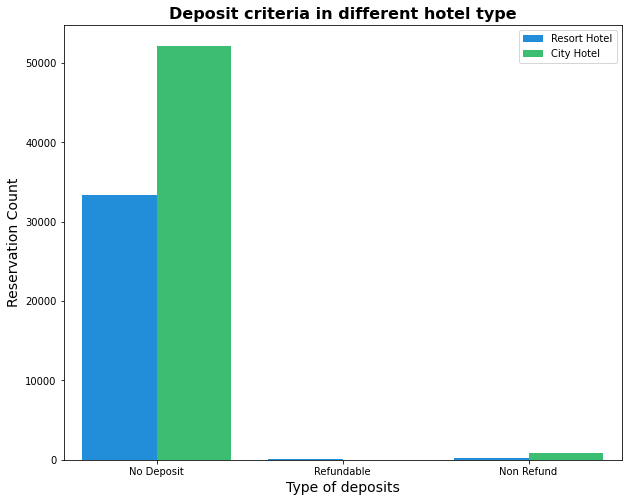

In [61]:
# Chart - 11 visualization code
plt.figure(figsize=(10,8))
sns.set_palette("terrain")
sns.countplot(hue=df['hotel'],x=df['deposit_type'])
plt.title('Deposit criteria in different hotel type',fontsize = 16, fontweight='bold')
plt.xlabel('Type of deposits',fontsize = 14)
plt.ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')   

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Most of the  deposits are not asked at time of booking in both the hotel types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***